<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>Problem Statement</b></p>

Resale cars have a huge market base. Many of us consider buying a Used Car instead of a new one. There are so many fraud cases in the market that mislead to the wrong price.

<p style = "font-size : 28px ; color: blue;font-family:TimesNewRoman">
    <b>Attribute Information</b></p>

* name-Car name.
* year- Production Year.
* selling_price-Price of car in Rs.
* km_driven-car km.
* fuel_type-Diesel,Petrol,CNG,LPG,Electric.
* seller_type-Individual,Dealer,Trustmark Dealer.
* transmission-Manual,Automatic
* owner-first-0,second-1,third-3.

# Library & Data Import

In [1]:
import numpy as np 
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag 
import os
%matplotlib inline
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_csv(r'C:\Users\DEll\Desktop\Data_Science  Studies\PYTHON\PROJECT\Resale Car Price Prediction\car data.csv')
df=df.drop('Car_Name',axis=1)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


# Data Pre-Processing

In [3]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           301 non-null    int64  
 1   Selling_Price  301 non-null    float64
 2   Present_Price  301 non-null    float64
 3   Kms_Driven     301 non-null    int64  
 4   Fuel_Type      301 non-null    object 
 5   Seller_Type    301 non-null    object 
 6   Transmission   301 non-null    object 
 7   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.describe(include='object')

,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


### Identifying  Missing Value

In [7]:
df.isna().sum()

Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

# Exploratory data analysis

<AxesSubplot:>

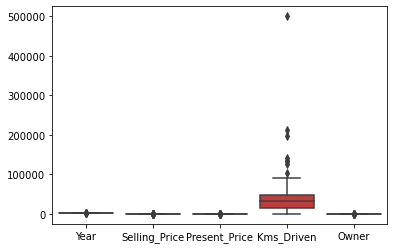

In [8]:
# Identifying outliers
sns.boxplot(data=df)

In [9]:
#Treating outliers
k=['Year','Selling_Price','Kms_Driven','Present_Price']
def treat_outliers(df):
    for i in k:    
        q1=df[i].quantile(0.25)
        q3=df[i].quantile(0.75)
        iqr=q3-q1
        upper_limit=q3+1.5*iqr
        lower_limit=q1-1.5*iqr
        if ((df[i].dtype=='float64') | (df[i].dtype=='int64')):
            df[i][df[i]<= lower_limit] = lower_limit
            df[i][df[i]>= upper_limit] = upper_limit
        else:
            df[i]=df[i]
    return df
        
treat_outliers(df)    

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


<AxesSubplot:>

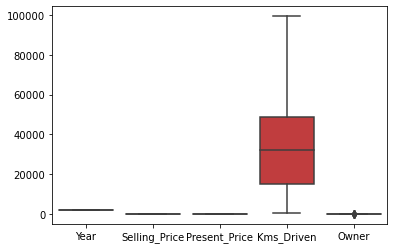

In [10]:
sns.boxplot(data=df)

<AxesSubplot:xlabel='Owner', ylabel='count'>

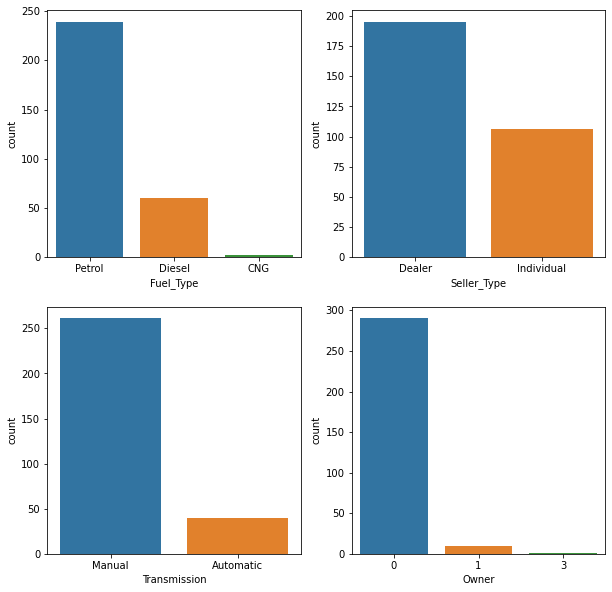

In [11]:
#Visualizing and Understanding distribution of Individual category by using Bar plot
fig, axarr  = plt.subplots(2,2,figsize=(10,10))
sns.countplot(x='Fuel_Type', data=df, ax=axarr[0,0])
sns.countplot(x= 'Seller_Type',data=df,ax=axarr[0,1])
sns.countplot(x='Transmission',data=df,ax=axarr[1,0])
sns.countplot(x='Owner',data=df,ax=axarr[1,1])

from above plot we can conclude that 
* count of petrol is more than the diesel and cng fuel type.
* most of the cars are sold by the dealer because the count of dealers is more than individuals.
* count of a manual transmission is more than automatic.
* count of the first owner is more compared to another type of two owners.

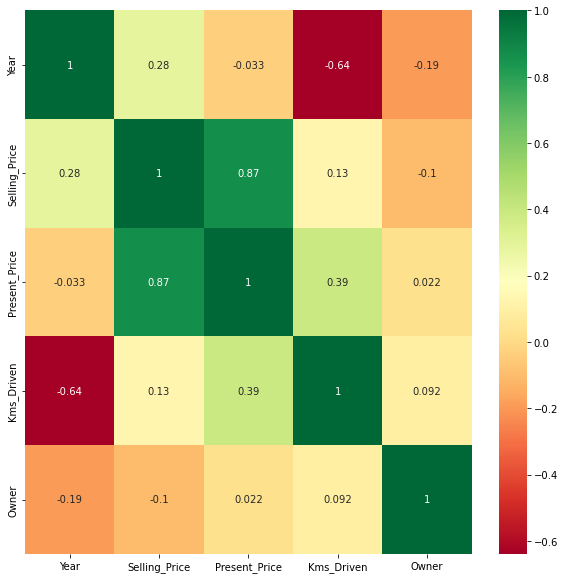

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

* Present_Price have 87% strong positive relationship between Present_Price and selling_price.
* There is no-colinearity in data.

 # Breaking Data into Two Part

* Quantitative Variable
* Qualitative Variable

In [13]:
df_num=df.select_dtypes(include=np.number)
df_num.head(3)

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2014,3.35,5.59,27000.0,0
1,2013,4.75,9.54,43000.0,0
2,2017,7.25,9.85,6900.0,0


### Taking Subset of Category Data 

In [14]:
df_cat=df.select_dtypes(include='object')
df_cat.head(3)

,Fuel_Type,Seller_Type,Transmission
0,Petrol,Dealer,Manual
1,Diesel,Dealer,Manual
2,Petrol,Dealer,Manual


### Converting Category Data to Number Data

In [15]:
df_cat=df_cat.apply(LabelEncoder().fit_transform)
df_cat.head(3)

,Fuel_Type,Seller_Type,Transmission
0,2,0,1
1,1,0,1
2,2,0,1


### Combinning Data Set

In [16]:
df_comb=pd.concat([df_cat,df_num],axis=1)
df_comb.head()

,Fuel_Type,Seller_Type,Transmission,Year,Selling_Price,Present_Price,Kms_Driven,Owner
0,2,0,1,2014,3.35,5.59,27000.0,0
1,1,0,1,2013,4.75,9.54,43000.0,0
2,2,0,1,2017,7.25,9.85,6900.0,0
3,2,0,1,2011,2.85,4.15,5200.0,0
4,1,0,1,2014,4.60,6.87,42450.0,0


# Data Partition

In [17]:
#Dividing data into train and test dataset
from sklearn.model_selection import train_test_split

x= df_comb.drop('Selling_Price',axis=1)
y= df_comb[['Selling_Price']]

# Train test split
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.3,random_state=231)
print(x_train.shape)
print(y_train.shape)

(210, 7)
(210, 1)


In [18]:
train=pd.concat([x_train,y_train],axis=1)
train.head(3)

,Fuel_Type,Seller_Type,Transmission,Year,Present_Price,Kms_Driven,Owner,Selling_Price
109,2,1,1,2017,1.470,11000.0,0,1.2
270,2,0,1,2011,10.000,69341.0,0,4.1
150,2,1,1,2011,0.826,6000.0,0,0.5


### Model Building

* H0 :- There is no linear relationship between Selling_Price and all independent Variable

Vs 

* H1 :- There is linear relationship between Selling_Price and all independent Variable

Alpha = 0.05 (5%)

In [19]:
import statsmodels.formula.api as smf
model = smf.ols('Selling_Price ~ Year+Present_Price+Kms_Driven+Fuel_Type+Seller_Type+Owner',data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     242.5
Date:                Tue, 26 Jul 2022   Prob (F-statistic):           1.07e-89
Time:                        10:16:55   Log-Likelihood:                -350.92
No. Observations:                 210   AIC:                             715.8
Df Residuals:                     203   BIC:                             739.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -619.7024     96.089     -6.449      0.000    -809.163    -430.242
Year              0.3095      0.048      6.501      0.000       0.216       0.403
Present_Price     0.4743      0.021     22.301      0.000       0.432       0.516
Kms_Driven    -1.652e-05   6.23e-06     -2.653      0.009   -2.88e-05   -4.24e-06
Fuel_Type        -0.9922      0.240     -4.130      0.000      -1.466      -0.519
Seller_Type      -0.9226      0.254     -3.628      0.000      -1.424      -0.421
Owner            -0.7831      0.327     -2.396      0.017      -1.427      -0.139
==============================================================================
Omnibus:                       11.841   Durbin-Watson:                   2.155
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               22.925
Skew:                          -0.230   Prob(JB):                     1.05e-05
Kurtosis:                       4.552   Cond. No.                     4.45e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.45e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 * 87% is accuracy of model , so we say model is good fit 

### Assumption of Model

### Linearity


<AxesSubplot:title={'center':'Selling_Price vs Present_Price'}, xlabel='Selling_Price', ylabel='Present_Price'>

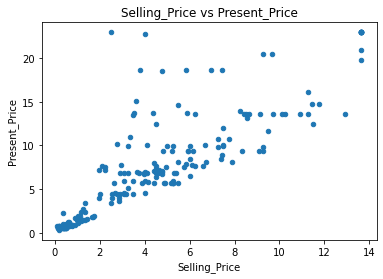

In [20]:
train.plot.scatter(x='Selling_Price',y='Present_Price',title='Selling_Price vs Present_Price')

### Prediction on Train Data

In [21]:
train['fitted_value']=model.fittedvalues
train['residual']=model.resid
train['Square_Error']=(train.residual)*(train.residual)
train.head()

,Fuel_Type,Seller_Type,Transmission,Year,Present_Price,Kms_Driven,Owner,Selling_Price,fitted_value,residual,Square_Error
109,2,1,1,2017,1.470,11000.0,0,1.20,2.256991,-1.056991,1.117229
270,2,0,1,2011,10.000,69341.0,0,4.10,4.404397,-0.304397,0.092657
150,2,1,1,2011,0.826,6000.0,0,0.50,0.176872,0.323128,0.104412
137,2,1,1,2013,0.787,16000.0,0,0.65,0.612247,0.037753,0.001425
95,2,0,1,2012,18.610,72000.0,0,5.85,8.753880,-2.903880,8.432517


### Homoscedasicity

<AxesSubplot:xlabel='fitted_value', ylabel='residual'>

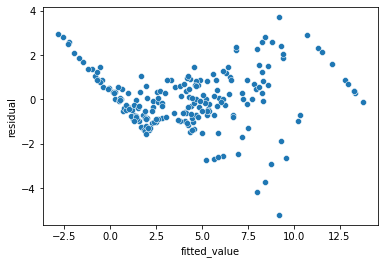

In [22]:
sns.scatterplot(x='fitted_value',y='residual',data=train)

### Normality

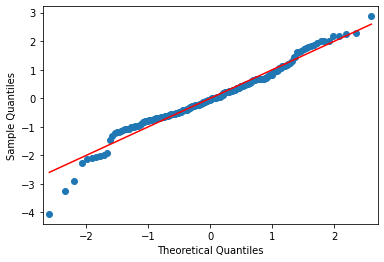

In [23]:
fig = sm.qqplot(train['residual'], fit=True, line='s') 
plt.show()

### Model Error are IID 

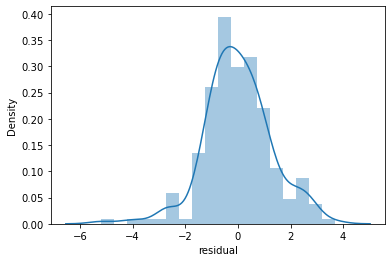

In [24]:
ax = sns.distplot(train.residual) 

### Prediction on Test Data

In [25]:
test=pd.concat([x_test,y_test],axis=1)
test.head(3)

,Fuel_Type,Seller_Type,Transmission,Year,Present_Price,Kms_Driven,Owner,Selling_Price
152,2,1,1,2012,0.99,13000.0,0,0.50
46,2,0,1,2013,4.89,64532.0,0,2.65
168,2,1,1,2013,0.73,12000.0,0,0.42


In [26]:
test['Prediction']=model.predict(test)
test['Error']=test.Selling_Price-test.Prediction
test['Square_Error']=(test.Error)*(test.Error)
test.head()

,Fuel_Type,Seller_Type,Transmission,Year,Present_Price,Kms_Driven,Owner,Selling_Price,Prediction,Error,Square_Error
152,2,1,1,2012,0.99,13000.0,0,0.50,0.448554,0.051446,0.002647
46,2,0,1,2013,4.89,64532.0,0,2.65,2.679178,-0.029178,0.000851
168,2,1,1,2013,0.73,12000.0,0,0.42,0.651297,-0.231297,0.053498
62,1,0,0,2014,22.95,78000.0,0,13.65,12.324592,1.325408,1.756707
74,1,0,1,2014,8.93,83000.0,0,4.90,5.592060,-0.692060,0.478947


### RMSE

### Train

In [27]:
train_r=np.mean(train.Square_Error)
train_r

1.6557329849918454

In [28]:
import math
rmse_train= math.sqrt(train_r)
rmse_train

1.2867528841979898

### Test

In [29]:
test_r=np.mean(test.Square_Error)
test_r

1.5263452851528359

In [30]:
rmse_test= math.sqrt(test_r)
rmse_test

1.2354534734877052

* Train Data :  RMSE <= 10 then model is good fit 

* Test Data :  RMSE <= 10 then model Performance is good 

In [31]:
import pickle
# open a file, where you want to store the data
file = open('Linear_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)